<a href="https://colab.research.google.com/github/Anshu6070/ML.github.io/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
# Import the NumPy library and alias it as 'np'
import numpy as np

# NumPy is a powerful library for numerical computations in Python.
# It is commonly used for operations involving arrays, matrices, and mathematical functions.

# Import the Matplotlib library for creating plots and alias it as 'plt'
import matplotlib.pyplot as plt

# Matplotlib is a popular library for data visualization in Python.
# 'plt' is a commonly used abbreviation for referring to Matplotlib functions.



In [96]:
# Import the Pandas library and alias it as 'pd'
import pandas as pd

# Specify the name of the Excel file you want to load
excel_file = 'circular_data.xlsx'

# Use the pd.read_excel() function to read the data from the Excel file into a DataFrame
df = pd.read_excel(excel_file)

# Display the first few rows of the DataFrame using the df.head() method
df.head()



,X,Y
0,2.000000,0.000000
1,1.532089,1.285575
2,0.347296,1.969616
3,-1.000000,1.732051
4,-1.879385,0.684040


In [98]:
# Extract the 'X' and 'Y' columns from the DataFrame
x = df['X']  # Extract the 'X' column
y = df['Y']  # Extract the 'Y' column

# Create a NumPy array 'X' by combining 'x' and 'y' as columns
X = np.array([x, y]).T

# Print the resulting array 'X'
print(X)


[[ 2.00000000e+00  0.00000000e+00]
 [ 1.53208889e+00  1.28557522e+00]
 [ 3.47296355e-01  1.96961551e+00]
 [-1.00000000e+00  1.73205081e+00]
 [-1.87938524e+00  6.84040287e-01]
 [-1.87938524e+00 -6.84040287e-01]
 [-1.00000000e+00 -1.73205081e+00]
 [ 3.47296355e-01 -1.96961551e+00]
 [ 1.53208889e+00 -1.28557522e+00]
 [ 2.00000000e+00 -4.89858720e-16]]


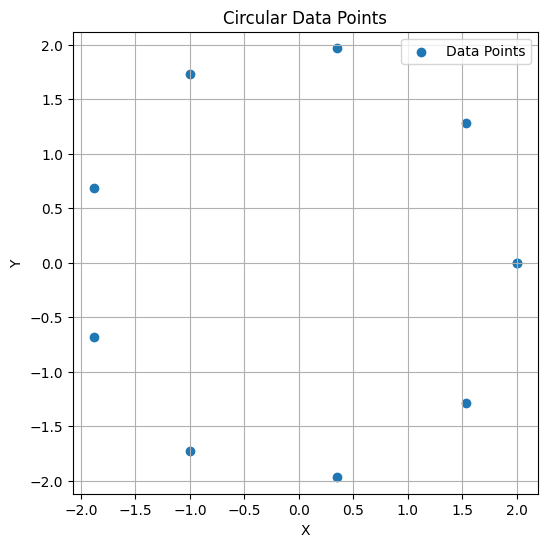

In [100]:
# Create a scatter plot
plt.figure(figsize=(6, 6))  # Set the figure size to (6, 6) inches

# Scatter plot of 'x' and 'y' with 'o' marker style
plt.scatter(x, y, marker='o', label='Data Points')

# Set the plot title and axis labels
plt.title('Circular Data Points')
plt.xlabel('X')
plt.ylabel('Y')

# Add a legend to the plot
plt.legend()

# Display the grid lines
plt.grid()

# Maintain equal scaling of x and y axes to make the plot look circular
plt.axis('equal')

# Show the plot
plt.show()


**without centering data**

In [102]:
# Calculate the covariance matrix
C = np.cov(X, rowvar=False)

# Print the covariance matrix
print(C)


[[2.40000000e+00 3.06579318e-16]
 [3.06579318e-16 2.00000000e+00]]


In [103]:
# Calculate the eigenvalues and eigenvectors of the covariance matrix
eval, evec = np.linalg.eig(C)

# Print the eigenvalues
print("Eigenvalues:")
print(eval)

# Print the eigenvectors
print("Eigenvectors:")
print(evec)


Eigenvalues:
[2.4 2. ]
Eigenvectors:
[[ 1.00000000e+00 -7.66448295e-16]
 [ 0.00000000e+00  1.00000000e+00]]


In [104]:
# Sort the eigenvalues in descending order and obtain the sorted indices
sorted_index = np.argsort(eval)[::-1]

# Sort the eigenvalues based on the sorted indices
sorted_eval = eval[sorted_index]

# Rearrange the eigenvectors based on the sorted indices
sorted_evec = evec[:, sorted_index]


In [109]:
# Set the number of principal components to retain
n = 1

# Select the first 'n' eigenvectors from the sorted eigenvectors
evec_subset = sorted_evec[:, 0:1]

# Print the selected eigenvectors
print(evec_subset)


[[1.]
 [0.]]


In [110]:
# Transform the data using the selected eigenvectors
X_reduced = np.dot(evec_subset.transpose(), X.transpose()).transpose()

# Print the transformed data
print(X_reduced)


[[ 2.        ]
 [ 1.53208889]
 [ 0.34729636]
 [-1.        ]
 [-1.87938524]
 [-1.87938524]
 [-1.        ]
 [ 0.34729636]
 [ 1.53208889]
 [ 2.        ]]


In [150]:
# Calculate the explained variance ratio for each principal component
explained_variance_ratio = sorted_eval / np.sum(sorted_eval)
print(explained_variance_ratio)
# Find the maximum value in the explained_variance_ratio vector
max_variance_ratio = np.max(explained_variance_ratio)



[0.54545455 0.45454545]


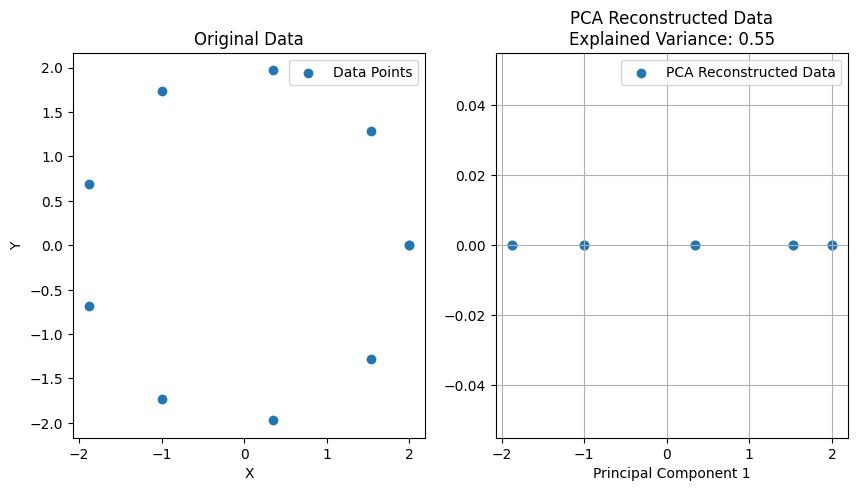

In [131]:
# Set the figure size to 10x5 inches
plt.figure(figsize=(10, 5))

# Create a subplot with 1 row and 2 columns, and select the first subplot (left)
plt.subplot(1, 2, 1)

# Create a scatter plot of the original data
plt.scatter(x, y, marker='o', label='Data Points')
# Uncomment the line below if you want to overlay the original data on the plot
# plt.scatter(data[:, 0], data[:, 1], label='Original Data')
plt.title('Original Data')  # Set the title of the first subplot
plt.xlabel('X')  # Label for the x-axis
plt.ylabel('Y')  # Label for the y-axis
plt.legend()  # Add a legend to the plot

# Create the second subplot (right)
plt.subplot(1, 2, 2)

# Project the data onto the first principal component
X_reduced = np.dot(evec_subset.transpose(), X.transpose()).transpose()

# Create a scatter plot of the PCA-reconstructed data
plt.scatter(X_reduced, np.zeros_like(X_reduced), marker='o', label='PCA Reconstructed Data')
plt.title(f'PCA Reconstructed Data\nExplained Variance: {max_variance_ratio:.2f}')  # Set the title with explained variance
plt.xlabel('Principal Component 1')  # Label for the x-axis
plt.legend()  # Add a legend to the plot
plt.grid()  # Display grid lines
plt.show()  # Show the entire figure with both subplots


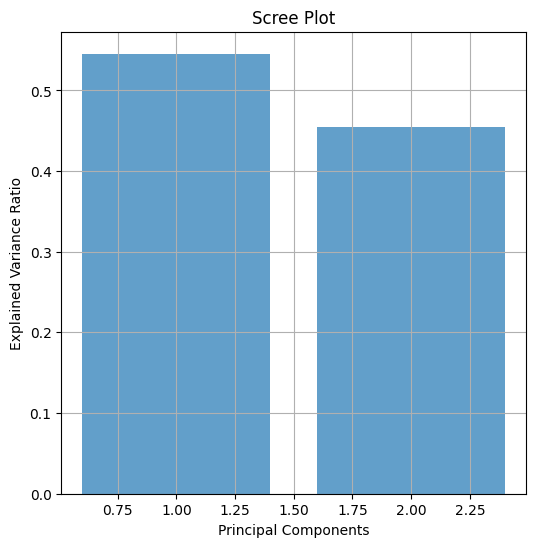

In [132]:
# Set the figure size
plt.figure(figsize=(6, 6))

# Create a bar chart for the explained variance ratio
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')

# Set labels and title
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')

# Display grid lines
plt.grid(True)

# Show the plot
plt.show()


**With centering data**

In [136]:
X_meaned=X-np.mean(X, axis=0)
print(X_meaned)

[[ 1.80000000e+00 -3.98319700e-17]
 [ 1.33208889e+00  1.28557522e+00]
 [ 1.47296355e-01  1.96961551e+00]
 [-1.20000000e+00  1.73205081e+00]
 [-2.07938524e+00  6.84040287e-01]
 [-2.07938524e+00 -6.84040287e-01]
 [-1.20000000e+00 -1.73205081e+00]
 [ 1.47296355e-01 -1.96961551e+00]
 [ 1.33208889e+00 -1.28557522e+00]
 [ 1.80000000e+00 -5.29690690e-16]]


In [137]:
# Assuming X_meaned is mean-centered data
x_meaned = X_meaned[0, :]  # Extract the first row (x-values)
y_meaned = X_meaned[1, :]  # Extract the second row (y-values)

In [152]:
C=np.cov(X_meaned,rowvar=False)
print(C)

[[2.40000000e+00 2.50066318e-16]
 [2.50066318e-16 2.00000000e+00]]


In [153]:
eval, evec=np.linalg.eig(C)
print(eval)
print(evec)

[2.4 2. ]
[[ 1.00000000e+00 -6.25165794e-16]
 [ 0.00000000e+00  1.00000000e+00]]


In [154]:
sorted_index=np.argsort(eval)[::-1]
sorted_eval=eval[sorted_index]
sorted_evec=evec[:,sorted_index]

In [155]:
n=1
evec_subset=sorted_evec[:,0:n]
print(evec_subset)

[[1.]
 [0.]]


In [156]:
 #transform data
 X_reduced=np.dot(evec_subset.transpose(), X_meaned.transpose()).transpose()
 print(X_reduced)


[[ 1.8       ]
 [ 1.33208889]
 [ 0.14729636]
 [-1.2       ]
 [-2.07938524]
 [-2.07938524]
 [-1.2       ]
 [ 0.14729636]
 [ 1.33208889]
 [ 1.8       ]]


In [164]:
# Calculate the explained variance ratio for each principal component
explained_variance_ratio = sorted_eval / np.sum(sorted_eval)
print(explained_variance_ratio)
# Find the maximum value in the explained_variance_ratio vector
max_variance_ratio = np.max(explained_variance_ratio)



[0.54545455 0.45454545]


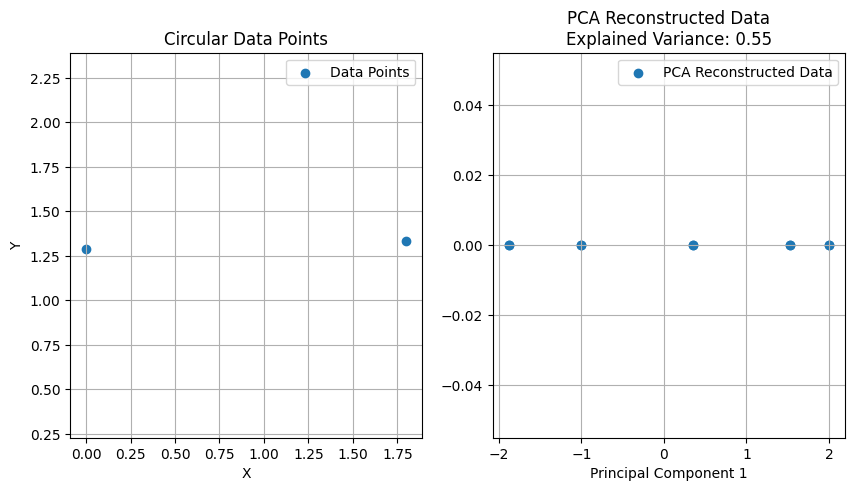

In [165]:
# Set the figure size to 10x5 inches
plt.figure(figsize=(10, 5))

# Create a subplot with 1 row and 2 columns, and select the first subplot (left)
plt.subplot(1, 2, 1)
plt.scatter(x_meaned, y_meaned, marker='o', label='Data Points')
plt.title('Circular Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.axis('equal')  # To maintain equal scaling of x and y axes
plt.legend()  # Add a legend to the plot



# Create the second subplot (right)
plt.subplot(1, 2, 2)

# Project the data onto the first principal component
X_reduced = np.dot(evec_subset.transpose(), X.transpose()).transpose()

# Create a scatter plot of the PCA-reconstructed data
plt.scatter(X_reduced, np.zeros_like(X_reduced), marker='o', label='PCA Reconstructed Data')
plt.title(f'PCA Reconstructed Data\nExplained Variance: {max_variance_ratio:.2f}')  # Set the title with explained variance
plt.xlabel('Principal Component 1')  # Label for the x-axis
plt.legend()  # Add a legend to the plot
plt.grid()  # Display grid lines
plt.show()  # Show the entire figure with both subplots

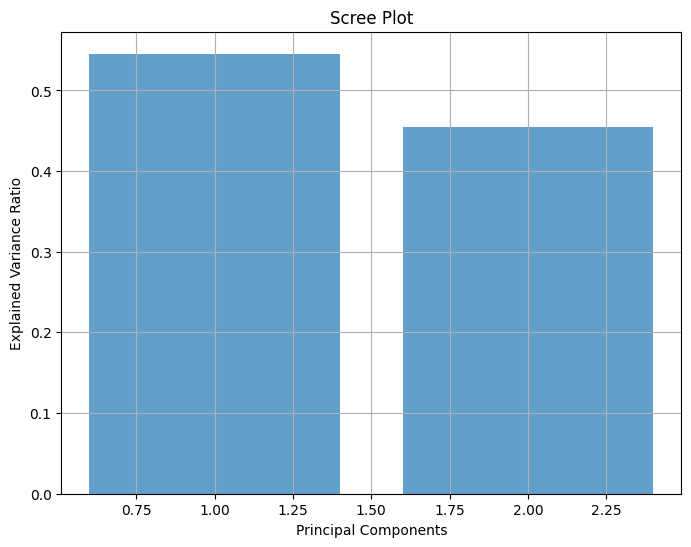

In [160]:
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

**In this code we use Scikit-Learn library**

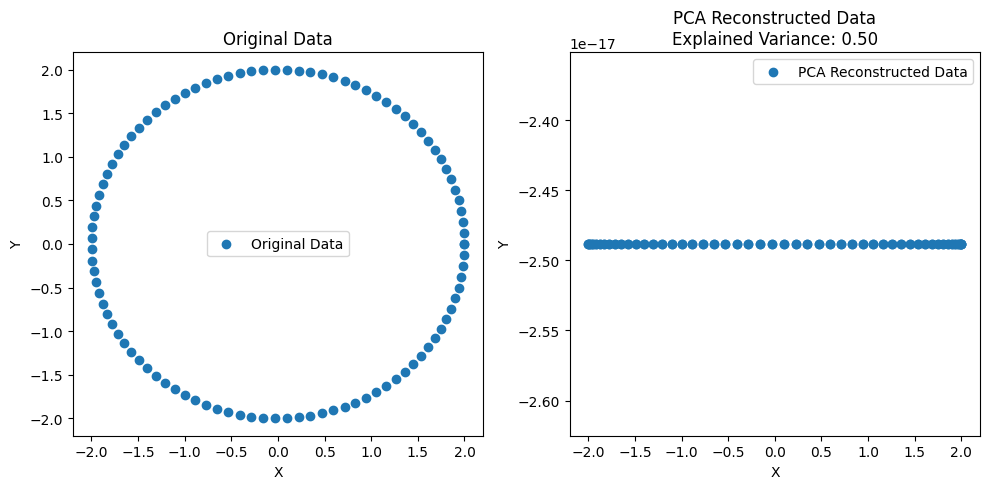

In [161]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# n is here how many data point you want in circular shape
n=10
# Create circular dataset
theta = np.linspace(0, 2*np.pi, n)
radius = 2
x = radius * np.cos(theta)
y = radius * np.sin(theta)
data = np.vstack((x, y)).T

# Apply PCA
pca = PCA(n_components=1)
data_pca = pca.fit_transform(data)

# Variance explained by the first principal component
explained_variance = pca.explained_variance_ratio_[0]

# Inverse transform PCA data back to original space
data_reconstructed = pca.inverse_transform(data_pca)

# Plot original data and PCA-reconstructed data
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], label='Original Data')
plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(data_reconstructed[:, 0], data_reconstructed[:, 1], label='PCA Reconstructed Data')
plt.title(f'PCA Reconstructed Data\nExplained Variance: {explained_variance:.2f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.tight_layout()
plt.show()



**Here we apply PCA but my data point in linear trend**

In [166]:
import numpy as np

X=np.array([[1,3,5,7,9],[5,7,11,14,15]])
X=X.T
print(X)

[[ 1  5]
 [ 3  7]
 [ 5 11]
 [ 7 14]
 [ 9 15]]


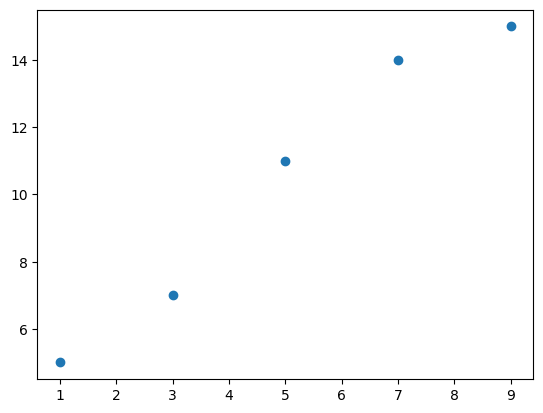

In [167]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1])

[[-4.  -5.4]
 [-2.  -3.4]
 [ 0.   0.6]
 [ 2.   3.6]
 [ 4.   4.6]]


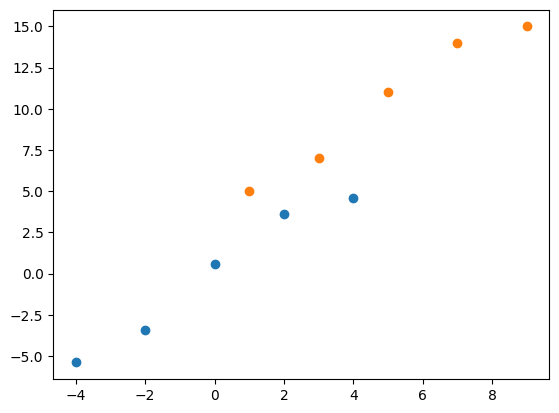

In [168]:
X_meaned=X-np.mean(X, axis=0)
print(X_meaned)
plt.figure
plt.scatter(X_meaned[:,0],X_meaned[:,1])
plt.scatter(X[:,0],X[:,1])

In [169]:
C=np.cov(X_meaned,rowvar=False)
print(C)

[[10.  13.5]
 [13.5 18.8]]


In [170]:
eval, evec=np.linalg.eig(C)
print(eval)
print(evec)

[ 0.20105638 28.59894362]
[[-0.80928432 -0.58741714]
 [ 0.58741714 -0.80928432]]


In [171]:
sorted_index=np.argsort(eval)[::-1]
sorted_eval=eval[sorted_index]
sorted_evec=evec[:,sorted_index]

In [172]:
n=1
evec_subset=sorted_evec[:,0:n]
print(evec_subset)

[[-0.58741714]
 [-0.80928432]]


In [173]:
 #transform data
 X_reduced=np.dot(evec_subset.transpose(), X_meaned.transpose()).transpose()
 print(X_reduced)


[[ 6.71980386]
 [ 3.92640095]
 [-0.48557059]
 [-4.08825782]
 [-6.07237641]]


In [174]:
# Calculate the explained variance ratio for each principal component
explained_variance_ratio = sorted_eval / np.sum(sorted_eval)
print(explained_variance_ratio)
# Find the maximum value in the explained_variance_ratio vector
max_variance_ratio = np.max(explained_variance_ratio)



[0.99301888 0.00698112]


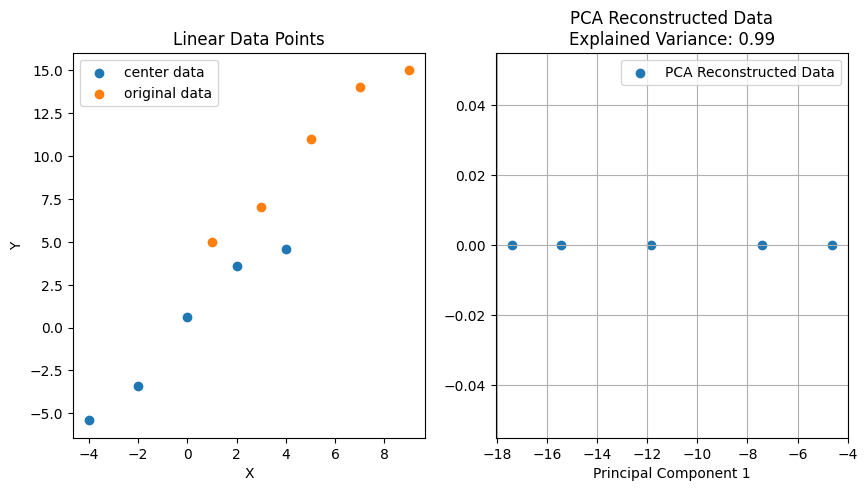

In [175]:
# Set the figure size to 10x5 inches
plt.figure(figsize=(10, 5))

# Create a subplot with 1 row and 2 columns, and select the first subplot (left)
plt.subplot(1, 2, 1)
plt.scatter(X_meaned[:,0],X_meaned[:,1], marker='o',label='center data')
plt.scatter(X[:,0],X[:,1],marker='o',label='original data')
#plt.scatter(x_meaned, y_meaned, marker='o', label='Data Points')
plt.title('Linear Data Points')
plt.xlabel('X')
plt.ylabel('Y')

#plt.axis('equal')  # To maintain equal scaling of x and y axes
plt.legend()  # Add a legend to the plot



# Create the second subplot (right)
plt.subplot(1, 2, 2)

# Project the data onto the first principal component
X_reduced = np.dot(evec_subset.transpose(), X.transpose()).transpose()

# Create a scatter plot of the PCA-reconstructed data
plt.scatter(X_reduced, np.zeros_like(X_reduced), marker='o', label='PCA Reconstructed Data')
plt.title(f'PCA Reconstructed Data\nExplained Variance: {max_variance_ratio:.2f}')  # Set the title with explained variance
plt.xlabel('Principal Component 1')  # Label for the x-axis
plt.legend()  # Add a legend to the plot
plt.grid()  # Display grid lines
plt.show()  # Show the entire figure with both subplots